In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
from utils.DataGenerator import DataGenerator
from datasets.cifar10 import previewGeneratorData, cifar10, previewDataset
from models.PartialCNNSimple.PCNN import PCNN, dice_coef

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10()
#previewDataset(x_train,y_train)

Loading CIFAR-10 dataset
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [25]:
trainGenerator = DataGenerator(x_train, x_train, shuffle=True)
testGenerator = DataGenerator(x_test, x_test, shuffle=False)

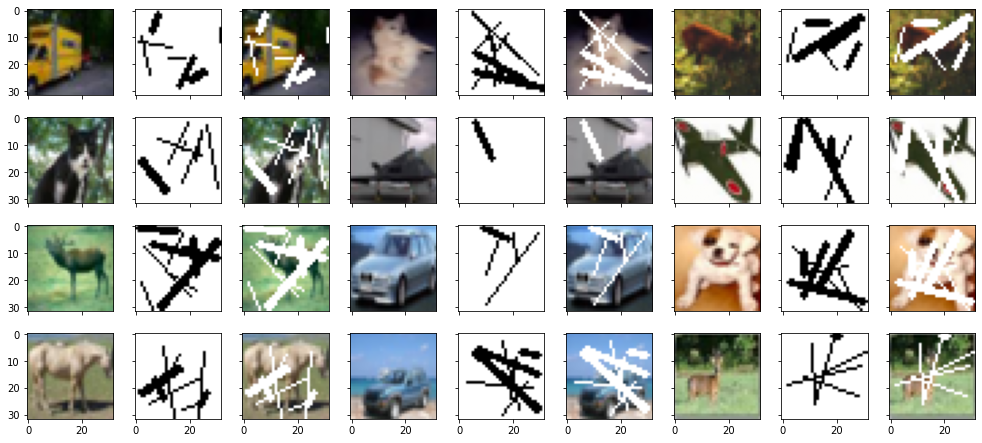

In [26]:
previewGeneratorData(trainGenerator)

In [27]:
keras.backend.clear_session()
model = PCNN().prepare_model()
model.summary()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[dice_coef])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
encoder_input (InputLayer)      [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1 (PConv2D)                 [(None, 32, 32, 32), 1760        input_1[0][0]                    
                                                                 encoder_input[0][0]              
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 32, 32, 32)   0           conv1[0][0]                  

In [28]:
_ = model.fit_generator(trainGenerator, validation_data=testGenerator, 
          epochs=1, 
          steps_per_epoch=len(trainGenerator), 
          validation_steps=len(testGenerator),
          callbacks=[])

/home/abhisheks/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
1562/1562 [==============================] - 1442s 921ms/step - loss: 0.1395 - dice_coef: 0.5084 - val_loss: 0.0761 - val_dice_coef: 0.5686


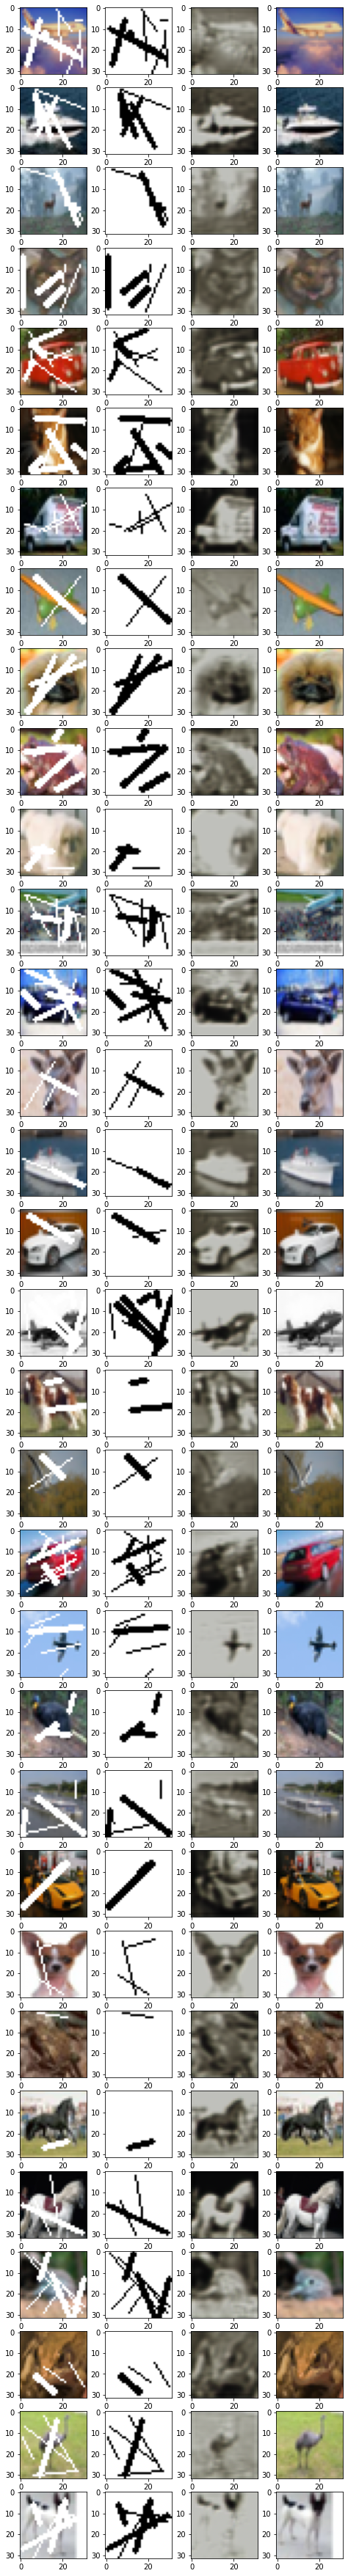

In [30]:
rows = 32
sample_idx = 54
[masked_images, masks], sample_labels = testGenerator[sample_idx]

fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(8, 2*rows))

for i in range(32):
  inputs = [masked_images[i].reshape((1,)+masked_images[i].shape), masks[i].reshape((1,)+masks[i].shape)]
  impainted_image = model.predict(inputs)
  axs[i][0].imshow(masked_images[i])
  axs[i][1].imshow(masks[i])
  axs[i][2].imshow(impainted_image.reshape(impainted_image.shape[1:]))
  axs[i][3].imshow(sample_labels[i])
  
plt.show()